In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='object').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='object').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

In [2]:
df= pd.read_excel(r'C:\Users\mohit\OneDrive\Desktop\omdena-texas-homelessness\src\data\income_related\Tx_LaborStats_2005-2021.xlsx')

In [3]:
df.head()

,Year,Period,Area,Area Type,Adjustment,Employment,Civilian Labor Force,Unemployment,Unemployment Rate
0,2005,March,Texas,Texas,Not Adjusted,10457456,11066337,608881,5.5
1,2005,March,Texas,Texas,Adjusted,10502785,11125846,623061,5.6
2,2005,June,Texas,Texas,Not Adjusted,10557049,11181612,624563,5.6
3,2005,June,Texas,Texas,Adjusted,10569961,11163389,593428,5.3
4,2005,September,Texas,Texas,Not Adjusted,10589753,11216770,627017,5.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16896 entries, 0 to 16895
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  16896 non-null  int64  
 1   Period                16896 non-null  object 
 2   Area                  16896 non-null  object 
 3   Area Type             16896 non-null  object 
 4   Adjustment            16896 non-null  object 
 5   Employment            16896 non-null  int64  
 6   Civilian Labor Force  16896 non-null  int64  
 7   Unemployment          16896 non-null  int64  
 8   Unemployment Rate     16896 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.2+ MB


In [5]:
categorical_eda(df)


To check: 
Unique count of non-numeric data

Period          4
Area          255
Area Type       2
Adjustment      2
dtype: int64
Top 5 unique values of Period
      Period  Count
0      March   4352
1       June   4352
2  September   4096
3   December   4096
 
Top 5 unique values of Area
                                                Area  Count
0                                              Texas    132
1  Navarro                                       ...     66
2  Maverick                                      ...     66
3  Medina                                        ...     66
4  Menard                                        ...     66
 
Top 5 unique values of Area Type
  Area Type  Count
0    County  16764
1     Texas    132
 
Top 5 unique values of Adjustment
     Adjustment  Count
0  Not Adjusted  16830
1      Adjusted     66
 


In [6]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [7]:
top5(df)

Top 5 unique values of Period
      Period  Count
0      March   4352
1       June   4352
2  September   4096
3   December   4096
 
Top 5 unique values of Area
                                                Area  Count
0                                              Texas    132
1  Navarro                                       ...     66
2  Maverick                                      ...     66
3  Medina                                        ...     66
4  Menard                                        ...     66
 
Top 5 unique values of Area Type
  Area Type  Count
0    County  16764
1     Texas    132
 
Top 5 unique values of Adjustment
     Adjustment  Count
0  Not Adjusted  16830
1      Adjusted     66
 



To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Year,16896.0,2012.757576,4.767647e+00,2005.0,2009.000,2013.0,2017.00,2021.0
Employment,16896.0,140756.415601,1.070909e+06,32.0,2822.750,7769.5,21289.00,13705505.0
Civilian Labor Force,16896.0,149173.849077,1.134510e+06,36.0,2997.000,8223.0,22742.25,14174181.0
Unemployment,16896.0,8417.433475,6.644457e+04,3.0,142.000,438.0,1384.50,1454139.0
Unemployment Rate,16896.0,5.575112,2.321590e+00,0.7,3.975,5.0,6.70,20.5


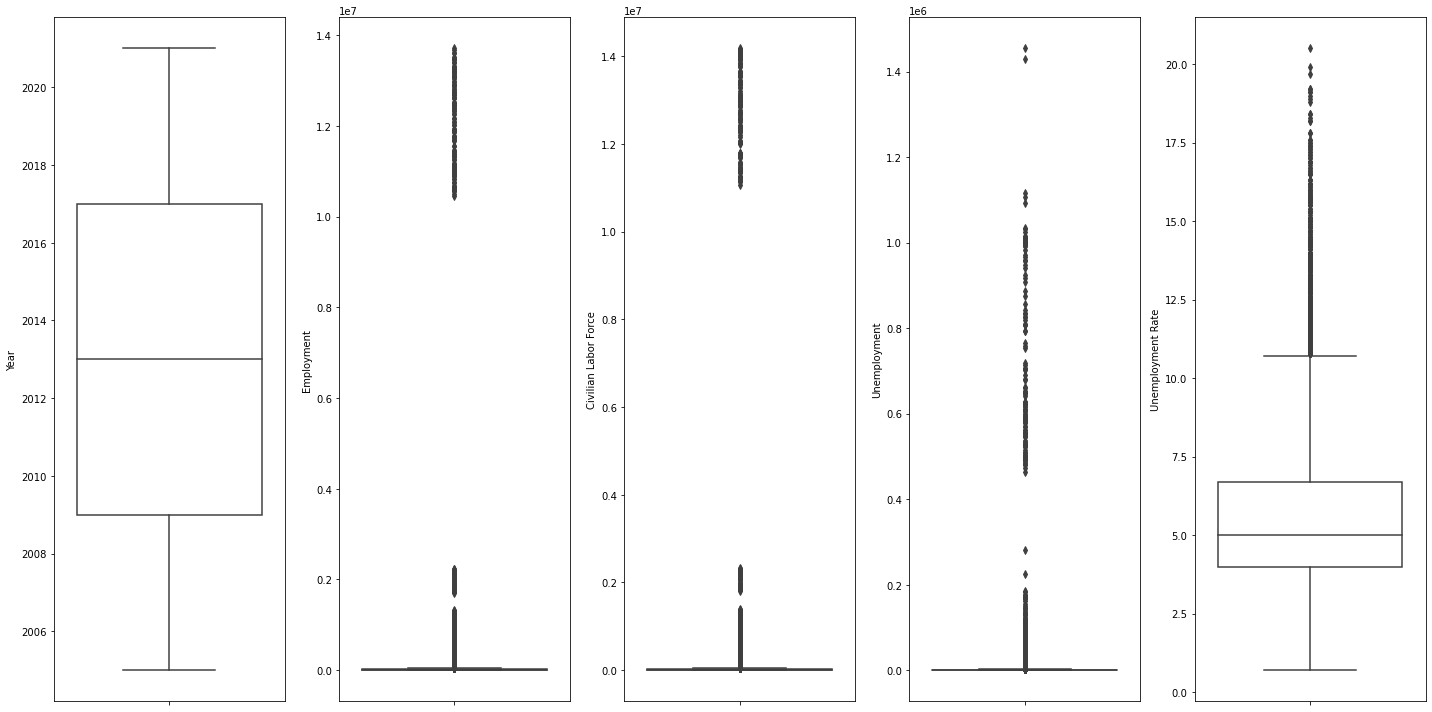


To check pairwise joint distribution of numeric data


KeyboardInterrupt: 

In [9]:
numeric_eda(df,hue=None)

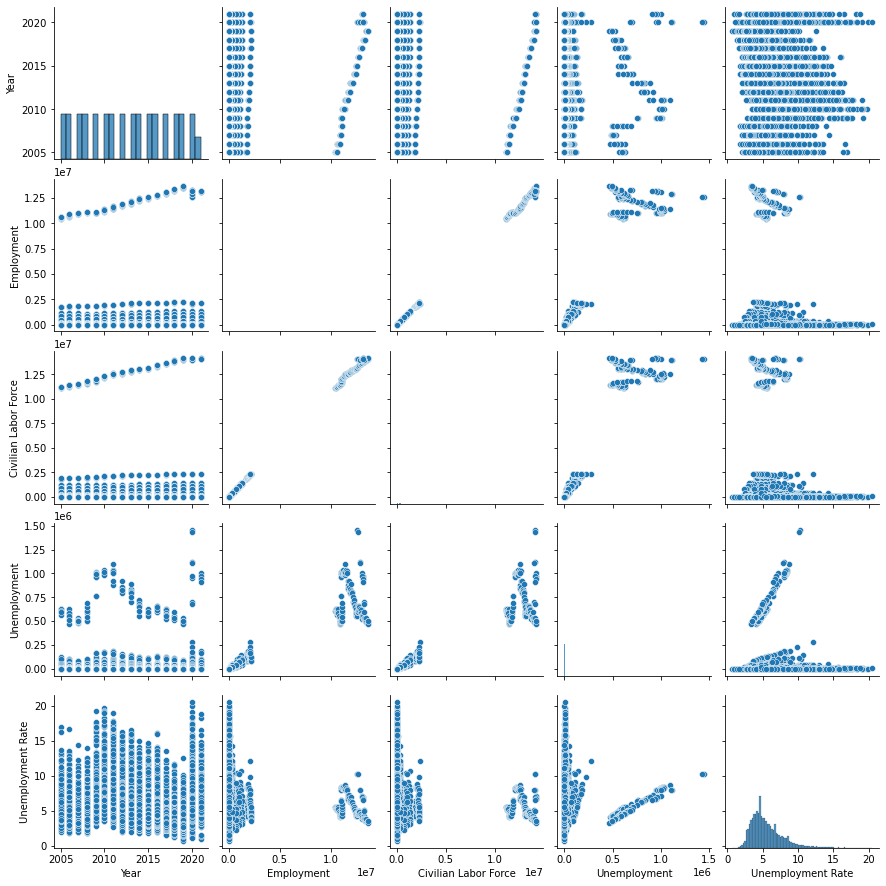

In [10]:
col = df.columns

sns.pairplot(df[col])

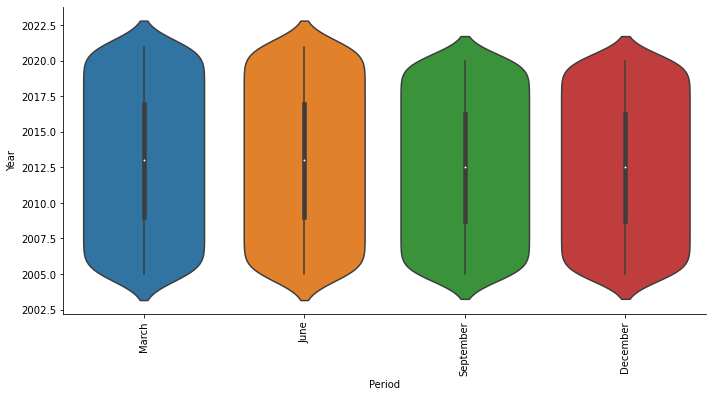

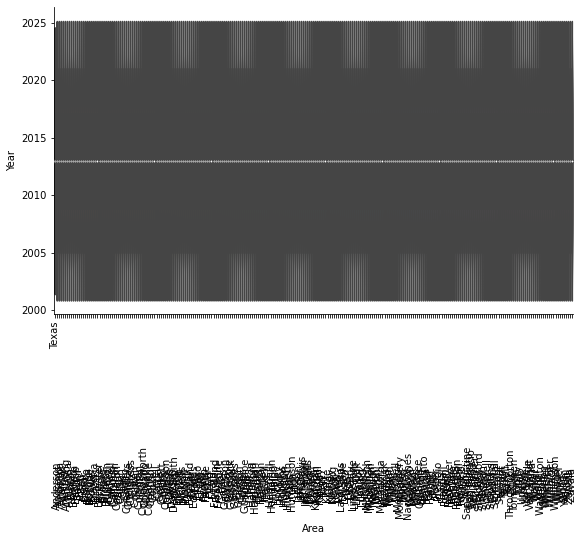

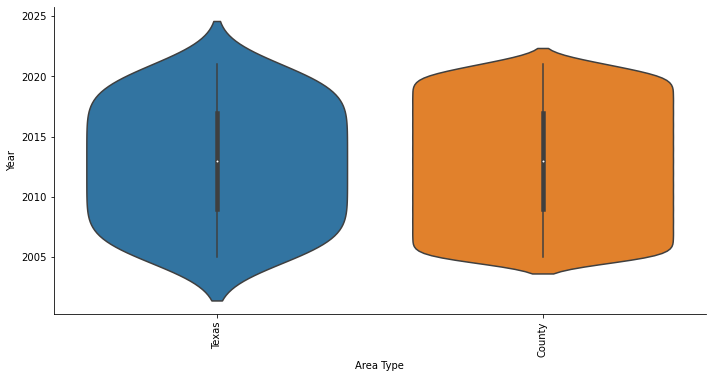

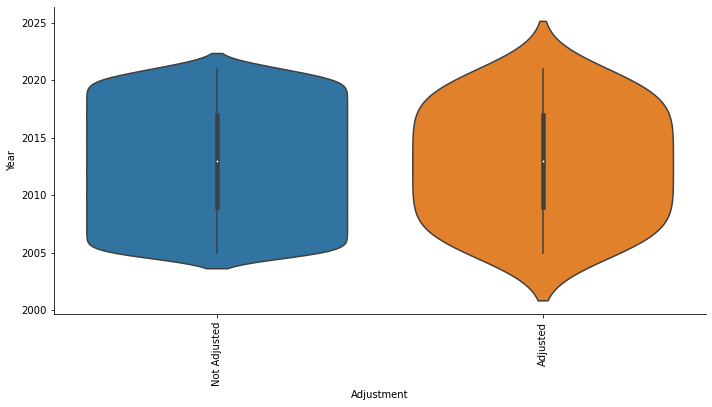

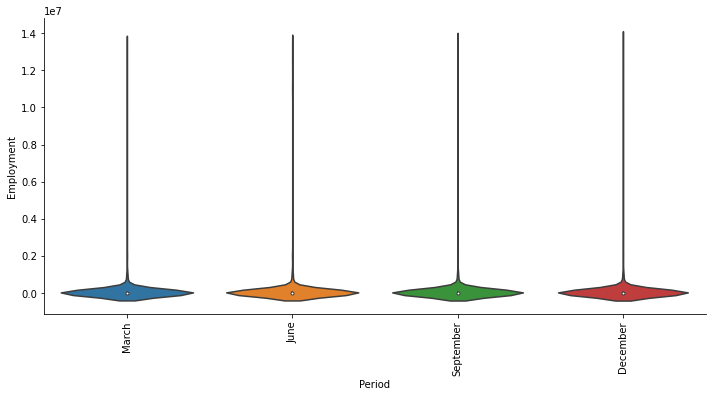

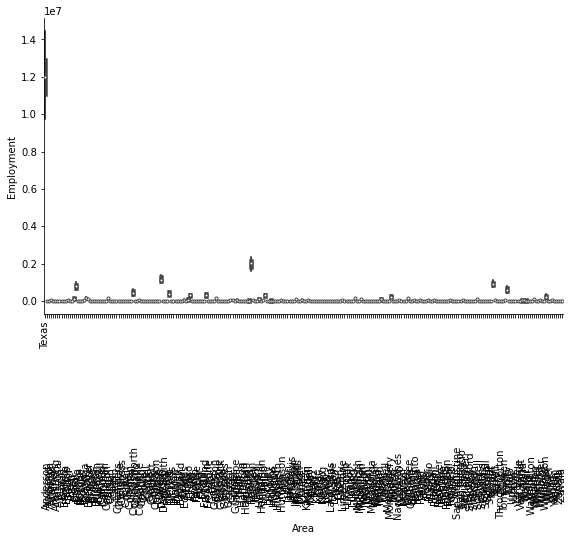

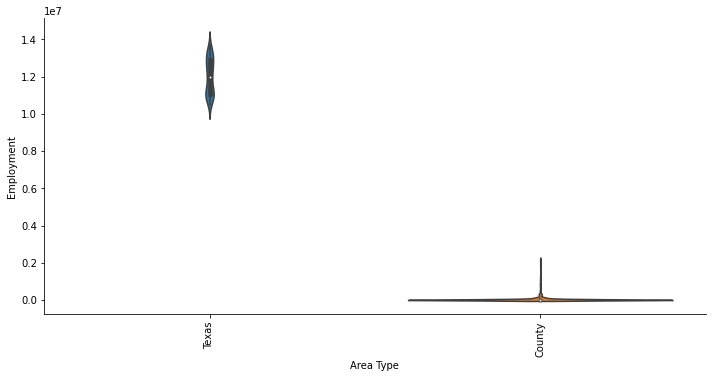

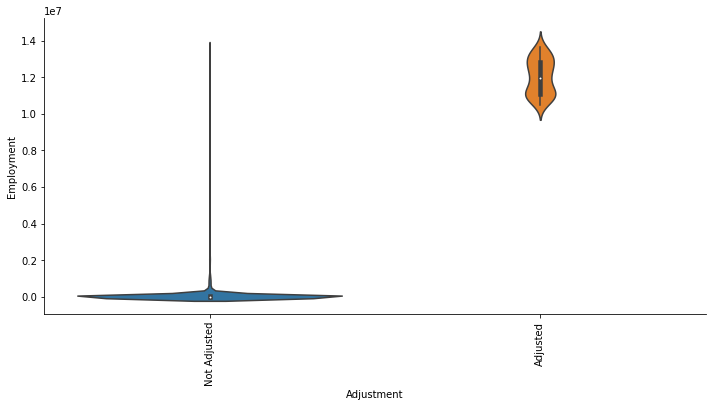

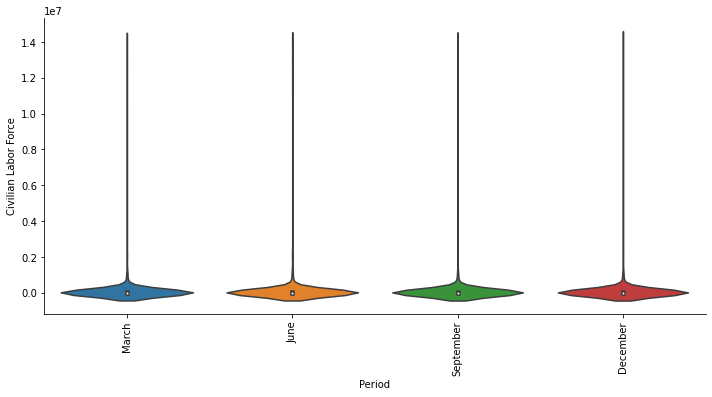

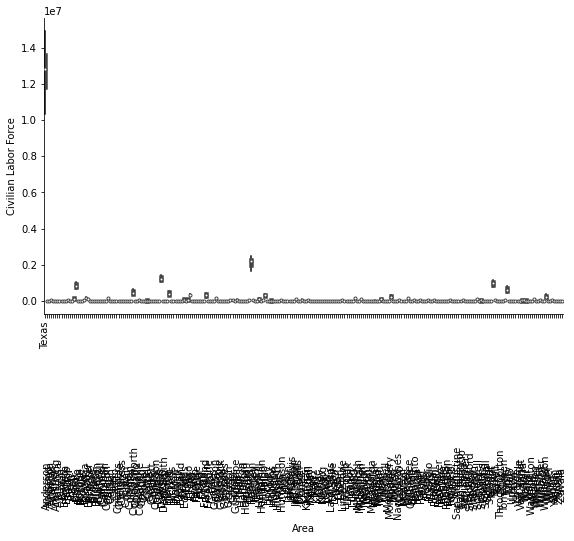

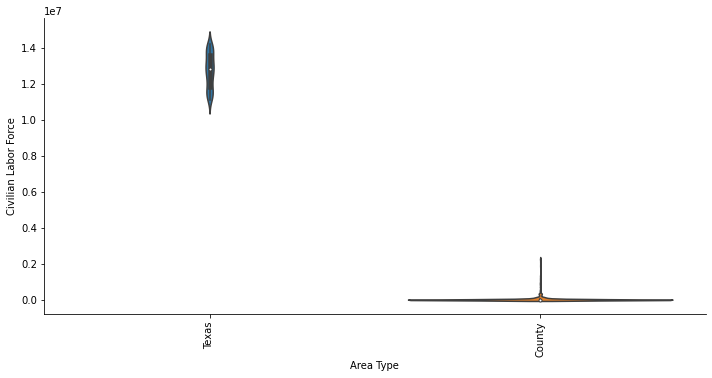

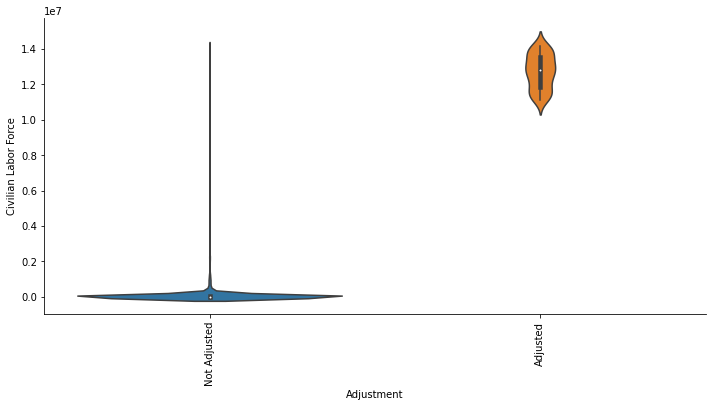

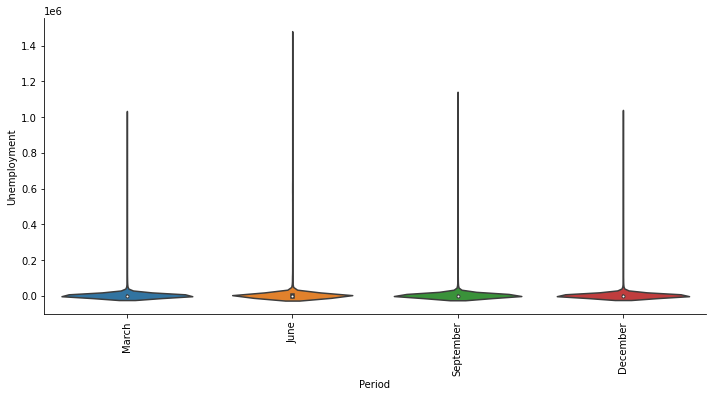

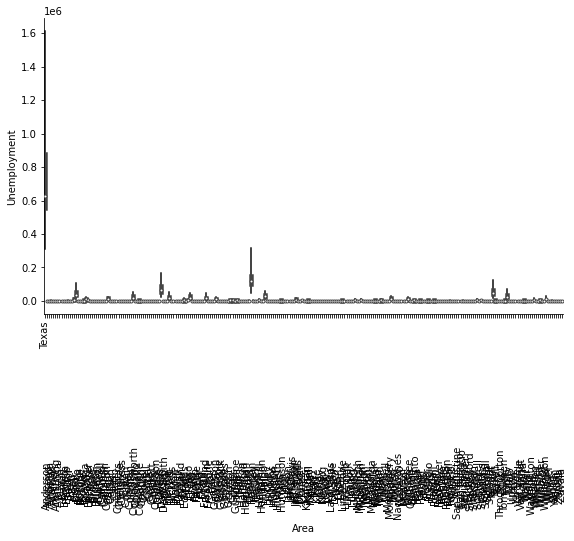

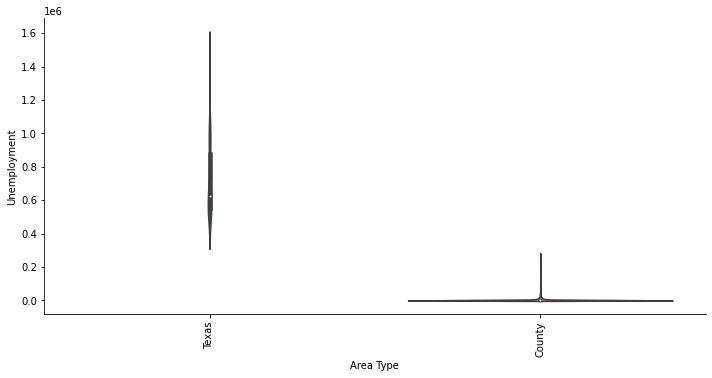

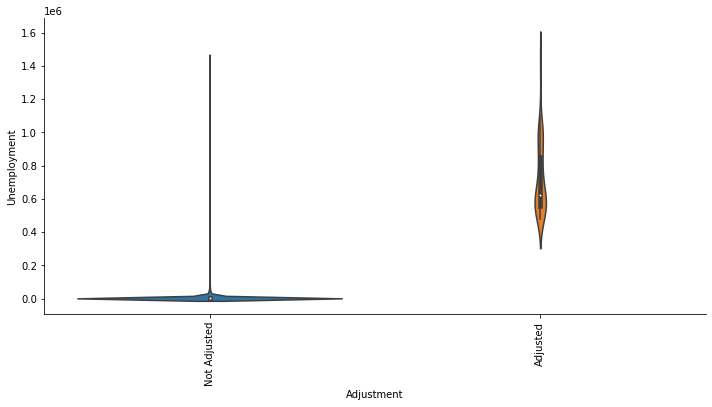

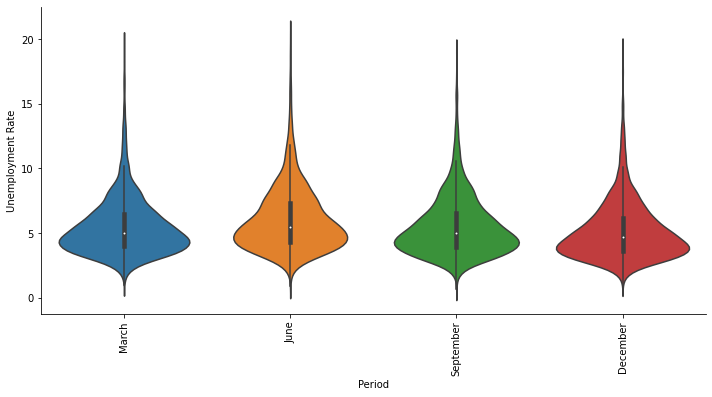

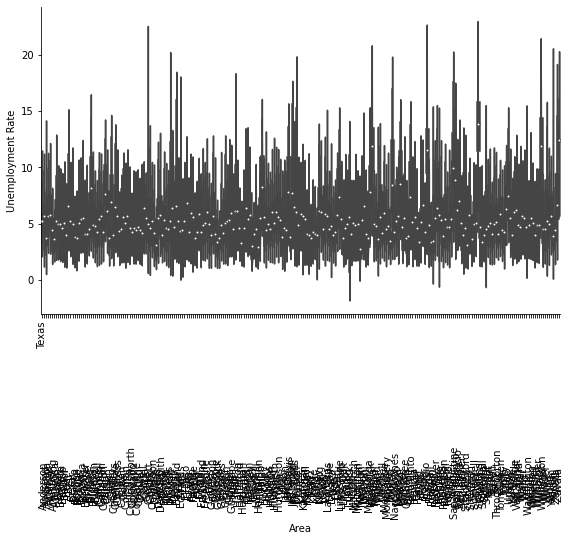

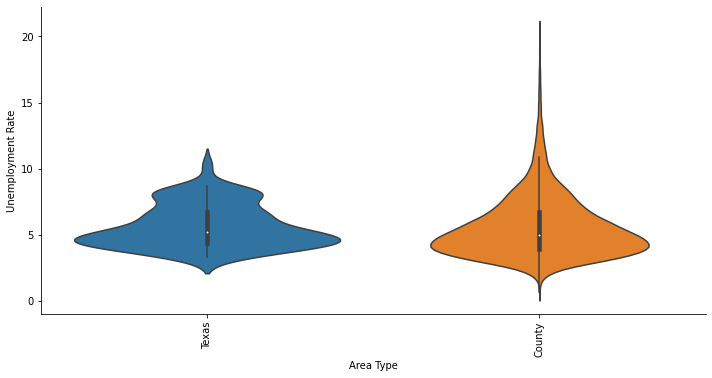

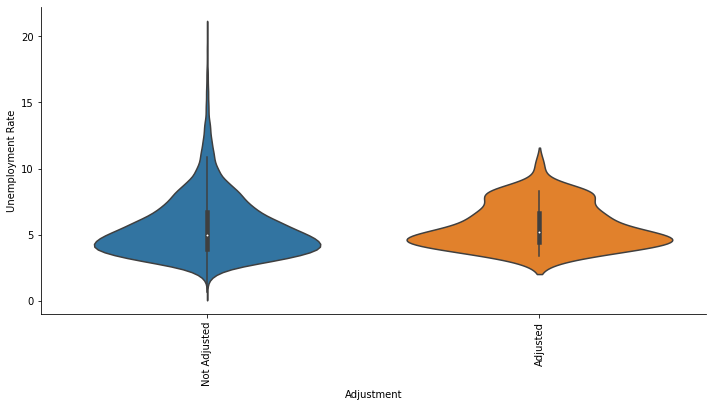

In [13]:
    if len(df.select_dtypes(include='object').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='object').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()

In [16]:
df.to_csv(r'C:\Users\mohit\OneDrive\Desktop\omdena-texas-homelessness\src\not_encoded_data\labor_stats.csv')